In [1]:
import xarray as xr
import pandas as pd
# import netCDF4
# import h5netcdf

# Les 4 datasets du GIEC sont gigantesques puisque les températures sont projetées sur toutes les latitudes et longitudes pour
# chaque jour jusqu'en 2100. Nous décidons de raisonner en moyenne mondiale annuelle. Les datasets modifiés seront extrémement
# allégés.

# Charger les fichiers NetCDF (Historique, scénario optimiste 2.6, scénario intermédiaire 4.5 et scénario du pire 8.5)
dataset_Historical = xr.open_dataset("ts_Amon_CNRM-CM6-1_historical_r1i1p1f2_gr_18500116-20141216.nc")
dataset_26 = xr.open_dataset("ts_Amon_CNRM-CM6-1_ssp126_r1i1p1f2_gr_20150116-21001216.nc")
dataset_45 = xr.open_dataset("ts_Amon_CNRM-CM6-1_ssp245_r1i1p1f2_gr_20150116-21001216.nc")
dataset_85 = xr.open_dataset("ts_Amon_CNRM-CM6-1_ssp585_r1i1p1f2_gr_20150116-21001216.nc")


# Convertir en dataframes
df_GIEC_Historical = dataset_Historical.to_dataframe().reset_index()
df_GIEC_26 = dataset_26.to_dataframe().reset_index()
df_GIEC_45 = dataset_45.to_dataframe().reset_index()
df_GIEC_85 = dataset_85.to_dataframe().reset_index()

# Pour chaque latitude/longitude et pour chaque journée nous avons deux lignes. Une ligne avec 0 dans la colonne axis-nbounds
# et une ligne avec 1. Il s'agit d'indexes des bornes (début/fin) des intervalles de temps.
# Nous décidons de ne conserver que les lignes où axis_nbounds est à 0 afin de ne garder que le début de chaque intervalle de temps,
# évitant ainsi la redondance des informations temporelles. Nous nous concentront ainsi sur le point initial de chaque période.
df_GIEC_Historical = df_GIEC_Historical[df_GIEC_Historical['axis_nbounds'] == 0]
df_GIEC_26 = df_GIEC_26[df_GIEC_26['axis_nbounds'] == 0]
df_GIEC_45 = df_GIEC_45[df_GIEC_45['axis_nbounds'] == 0]
df_GIEC_85 = df_GIEC_85[df_GIEC_85['axis_nbounds'] == 0]

# Convertir la température de Kelvin à Celsius
df_GIEC_Historical["ts_C"] = df_GIEC_Historical["ts"] - 273.15
df_GIEC_26["ts_C"] = df_GIEC_26["ts"] - 273.15
df_GIEC_45["ts_C"] = df_GIEC_45["ts"] - 273.15
df_GIEC_85["ts_C"] = df_GIEC_85["ts"] - 273.15

# Convertir la colonne 'time' en format datetime
df_GIEC_Historical["time"] = pd.to_datetime(df_GIEC_Historical["time"])
df_GIEC_26["time"] = pd.to_datetime(df_GIEC_26["time"])
df_GIEC_45["time"] = pd.to_datetime(df_GIEC_45["time"])
df_GIEC_85["time"] = pd.to_datetime(df_GIEC_85["time"])

# Extraire l'année et le mois
df_GIEC_Historical["year"] = df_GIEC_Historical["time"].dt.year
df_GIEC_Historical["month"] = df_GIEC_Historical["time"].dt.month
df_GIEC_26["year"] = df_GIEC_26["time"].dt.year
df_GIEC_26["month"] = df_GIEC_26["time"].dt.month
df_GIEC_45["year"] = df_GIEC_45["time"].dt.year
df_GIEC_45["month"] = df_GIEC_45["time"].dt.month
df_GIEC_85["year"] = df_GIEC_85["time"].dt.year
df_GIEC_85["month"] = df_GIEC_85["time"].dt.month

# Regrouper par année et moyenne mondiale
df_GIEC_Historical_Yearly = df_GIEC_Historical.groupby("year")["ts_C"].mean().reset_index()
df_GIEC_26_Yearly = df_GIEC_26.groupby("year")["ts_C"].mean().reset_index()
df_GIEC_45_Yearly = df_GIEC_45.groupby("year")["ts_C"].mean().reset_index()
df_GIEC_85_Yearly = df_GIEC_85.groupby("year")["ts_C"].mean().reset_index()

In [31]:
print(df_GIEC_Historical_Yearly.info())
print(df_GIEC_26_Yearly.info())
print(df_GIEC_45_Yearly.info())
print(df_GIEC_85_Yearly.info())

# Il n'y a pas de Nan's

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      165 non-null    int32  
 1   ts_C      165 non-null    float64
 2   Scenario  165 non-null    object 
dtypes: float64(1), int32(1), object(1)
memory usage: 3.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      86 non-null     int32  
 1   ts_C      86 non-null     float64
 2   Scenario  86 non-null     object 
dtypes: float64(1), int32(1), object(1)
memory usage: 1.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      86 non-null     int32  
 1   ts_C      86 non-null     float64
 2   Scenari

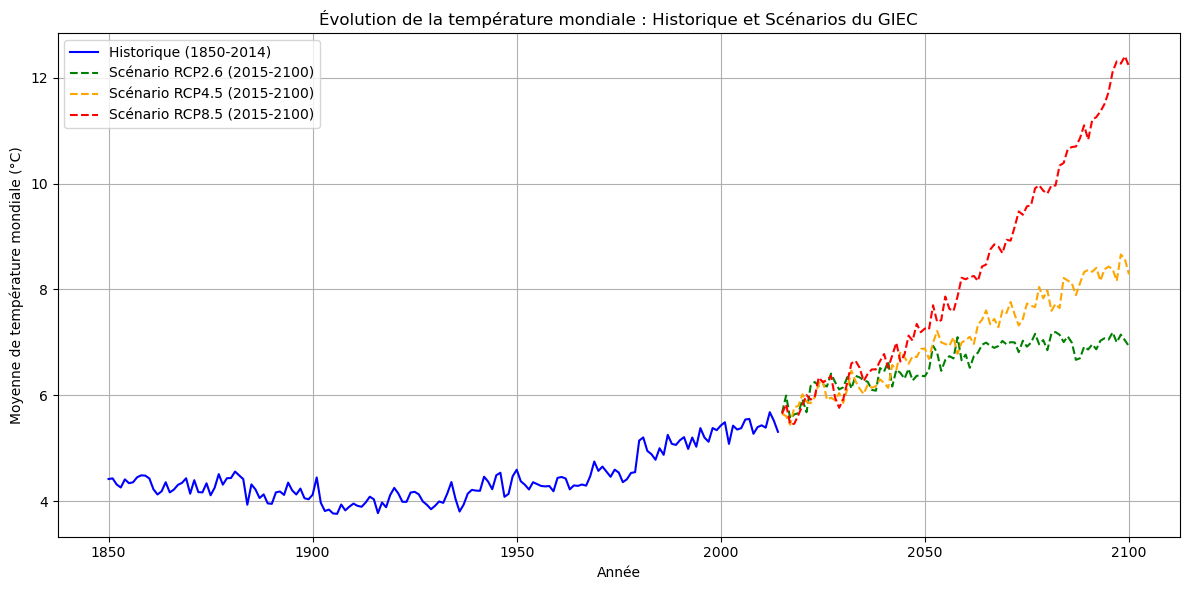

In [27]:
import matplotlib.pyplot as plt

historique_temp = df_GIEC_Historical_Yearly
scenario_26 = df_GIEC_26_Yearly
scenario_45 = df_GIEC_45_Yearly
scenario_85 = df_GIEC_85_Yearly


# Nom de la colonne de température
temp_col = 'ts_C'

# Création des colonnes 'Scenario'
historique_temp['Scenario'] = 'Historique'
scenario_26['Scenario'] = 'RCP2.6'
scenario_45['Scenario'] = 'RCP4.5'
scenario_85['Scenario'] = 'RCP8.5'

# Sélection des colonnes pertinentes
historique_temp = historique_temp[['year', temp_col, 'Scenario']].rename(columns={temp_col: 'Temperature'})
scenario_26 = scenario_26[['year', temp_col, 'Scenario']].rename(columns={temp_col: 'Temperature'})
scenario_45 = scenario_45[['year', temp_col, 'Scenario']].rename(columns={temp_col: 'Temperature'})
scenario_85 = scenario_85[['year', temp_col, 'Scenario']].rename(columns={temp_col: 'Temperature'})

# Concaténation des datasets
data_combine = pd.concat([historique_temp, scenario_26, scenario_45, scenario_85], ignore_index=True)


# Création du graphique
plt.figure(figsize=(12, 6))
plt.plot(data_combine[data_combine['Scenario'] == 'Historique']['year'],
         data_combine[data_combine['Scenario'] == 'Historique']['Temperature'],
         label='Historique (1850-2014)', color='blue')
plt.plot(data_combine[data_combine['Scenario'] == 'RCP2.6']['year'],
         data_combine[data_combine['Scenario'] == 'RCP2.6']['Temperature'],
         label='Scénario RCP2.6 (2015-2100)', color='green', linestyle='--')
plt.plot(data_combine[data_combine['Scenario'] == 'RCP4.5']['year'],
         data_combine[data_combine['Scenario'] == 'RCP4.5']['Temperature'],
         label='Scénario RCP4.5 (2015-2100)', color='orange', linestyle='--')
plt.plot(data_combine[data_combine['Scenario'] == 'RCP8.5']['year'],
         data_combine[data_combine['Scenario'] == 'RCP8.5']['Temperature'],
         label='Scénario RCP8.5 (2015-2100)', color='red', linestyle='--')

# Ajout des labels et du titre
plt.xlabel('Année')
plt.ylabel('Moyenne de température mondiale (°C)')
plt.title('Évolution de la température mondiale : Historique et Scénarios du GIEC')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()